# **코사인 유사도(Cosine Similarity)**  
코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미한다.  
코사인 유사도는 -1이상 1이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있다.  
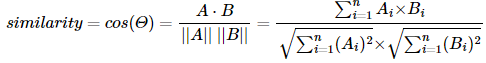

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [2]:
# Numpy를 사용해서 코사인 유사도를 계산하는 함수
def cos_sim(A, B):
  return dot(A, B) / (norm(A) * norm(B))

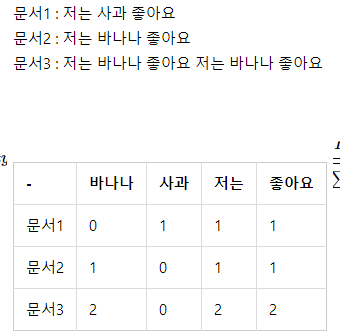

In [4]:
doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0 ,2, 2])

print("문서1과 문서2의 유사도 :", cos_sim(doc1, doc2))
print("문서1과 문서3의 유사도 :", cos_sim(doc1, doc3))
print("문서2과 문서3의 유사도 :", cos_sim(doc2, doc3))

문서1과 문서2의 유사도 : 0.6666666666666667
문서1과 문서3의 유사도 : 0.6666666666666667
문서2과 문서3의 유사도 : 1.0000000000000002


코사인 유사도는 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와준다.

# **유사도를 이용한 추천 시스템 구현하기**

**영화 데이터셋을 가지고 영화 추천 시스템 만들기**

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
data = pd.read_csv("/content/drive/MyDrive/딥러닝을 이용한 자연어 처리/5. 벡터의 유사도/movies_metadata.csv", low_memory=False)
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
# 상위 20000개의 샘플을 data에 저장
data = data.head(20000)

In [10]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print("overview 열의 결측값의 수 :", data['overview'].isnull().sum())

overview 열의 결측값의 수 : 135


In [11]:
# 결측값을 가진 행을 제거 -> pandas의 dropna()
# 결측값이 있는 행에 특정값으로 대체 -> pandas.fillna()

# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

In [13]:
# overview 열에 대해서 TF-IDF 행렬을 구한후 행렬의 크기를 출력
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print("TF-IDF 행렬의 크기(shape) :", tfidf_matrix.shape)
# 20000의 행을 가지고 47847의 열을 가지는 행렬

TF-IDF 행렬의 크기(shape) : (20000, 47487)


In [14]:
# 20000개의 각 문서 벡터(영화 줄거리 벡터)와 자기 자신을 포함한 20000개의 문서 벡터 간의 유사도가 기록된 행렬
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("코사인 유사도 연산 결과 :", cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


In [15]:
# 기존 데이터프레임으로부터 영화의 타이틀을 key, 영화의 인덱스를 vallue로 하는 딕셔너리
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part Ⅱ의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [16]:
# 선택한 영화의 제목을 입력하면
# 코사인 유사도를 통해 가장 overview가 유사한 10개의 영화를 찾아내는 함수
def get_recommendations(title, cosine_sim=cosine_sim):
  # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
  idx = title_to_index[title]

  # 해당 영화와 모든 영화와의 유사도를 가져온다.
  sim_scores = list(enumerate(cosine_sim[idx]))

  # 유사도에 따라 영화들을 정렬한다.
  sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
  
  # 가장 유사한 10개의 영화를 받아온다.
  sim_scores = sim_scores[1:11]

  # 가장 유사한 10개의 영화의 인덱스를 얻는다.
  movie_indices = [idx[0] for idx in sim_scores]

  # 가장 유사한 10개의 영화의 제목을 리턴한다.
  return data['title'].iloc[movie_indices]

In [17]:
# 영화 다크 나이트 라이즈와 overview가 유사한 영화 10개
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object